In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon, kendalltau
from utils import plot_longitudinal, get_diversity

# Compute GMHI2 scores

In [2]:
study = "P90"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN16701456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN16701455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN16701454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN16701453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN16701452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
9016,EEN,12,-0.428345
9016,EEN,11,-0.424356
9016,EEN,10,-1.038320
9016,EEN,9,-0.002693
9016,EEN,8,0.126793


# Compute other indices

In [6]:
np.unique(meta["timepoint"], return_counts=True)

(array(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5',
        '6', '7', '8', '9', 'PS'], dtype=object),
 array([18, 22, 28, 26, 27, 28, 24, 29, 25, 26, 29, 26, 29, 27, 18, 27, 19]))

In [7]:
for diet in meta["health_status/host_diet"].unique():
    d = meta[meta["health_status/host_diet"] == diet]
    s = (d["timepoint"] == "0").sum()
    print(diet)
    print(s)

EEN
9
Omnivore
9
Vegan
0


## vegan group doesn't have any day zero because they did not have a dietary intervention

In [8]:
meta = get_diversity(meta, X)
meta.head()

/Users/daniel/opt/anaconda3/envs/gmwi2_analysis/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity
Subject_ID,,,,,,
9016,EEN,12,-0.428345,19,1.834157,0.204109
9016,EEN,11,-0.424356,15,1.508526,0.310608
9016,EEN,10,-1.038320,18,1.834897,0.219087
9016,EEN,9,-0.002693,2,0.426438,0.015682
9016,EEN,8,0.126793,1,0.291104,0.024803


# Plot stuff now 

In [9]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

In [10]:
meta["timepoint_plot"] = [16 if time == "PS" else int(time) for time in meta["timepoint"]]
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,Simpson Diversity,timepoint_plot
Subject_ID,,,,,,,
9016,EEN,12,-0.428345,19,1.834157,0.204109,12
9016,EEN,11,-0.424356,15,1.508526,0.310608,11
9016,EEN,10,-1.038320,18,1.834897,0.219087,10
9016,EEN,9,-0.002693,2,0.426438,0.015682,9
9016,EEN,8,0.126793,1,0.291104,0.024803,8


In [11]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()), key=lambda x : 16 if x == "PS" else int(x))
timepoints_sorted

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 'PS']

In [12]:
indices = ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]

In [13]:
# only keep timepoints before intervention
meta = meta.iloc[[not time == "PS" and int(time) <= 6 for time in meta['timepoint']]]
timepoints_sorted = timepoints_sorted[:7]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plot_longitudinal(meta, indices, timepoints_sorted, study, stars=True)

EEN
Omnivore
Vegan


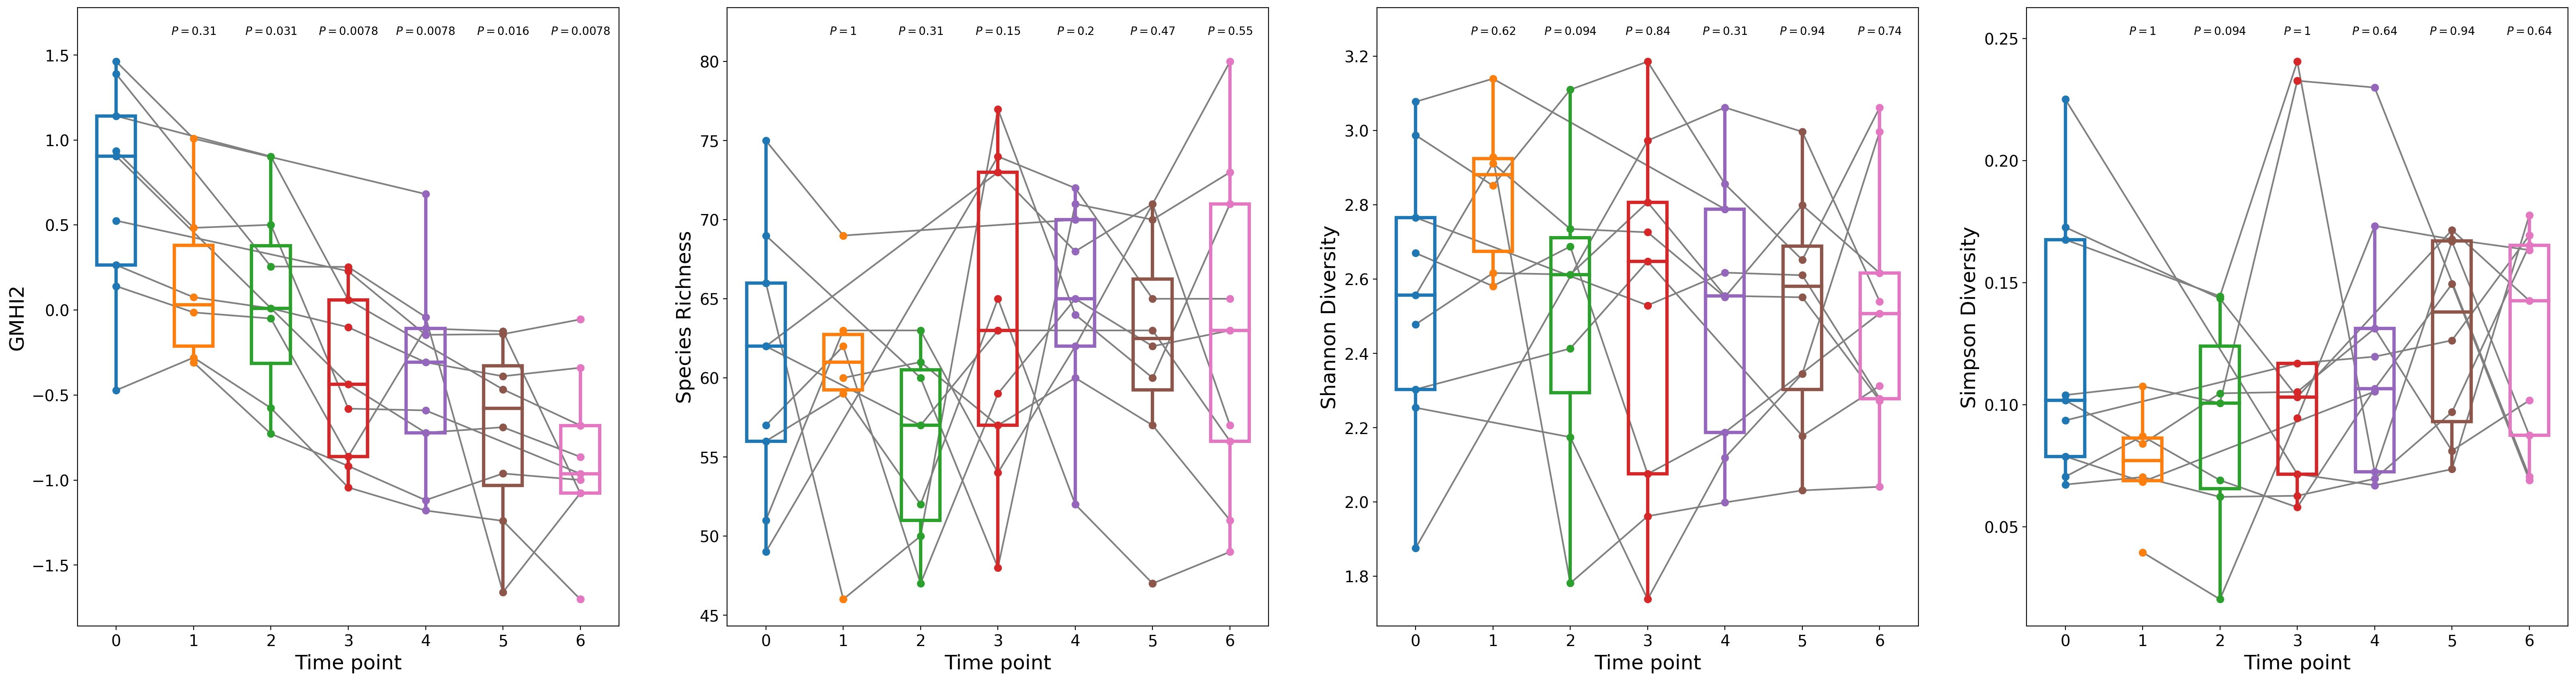

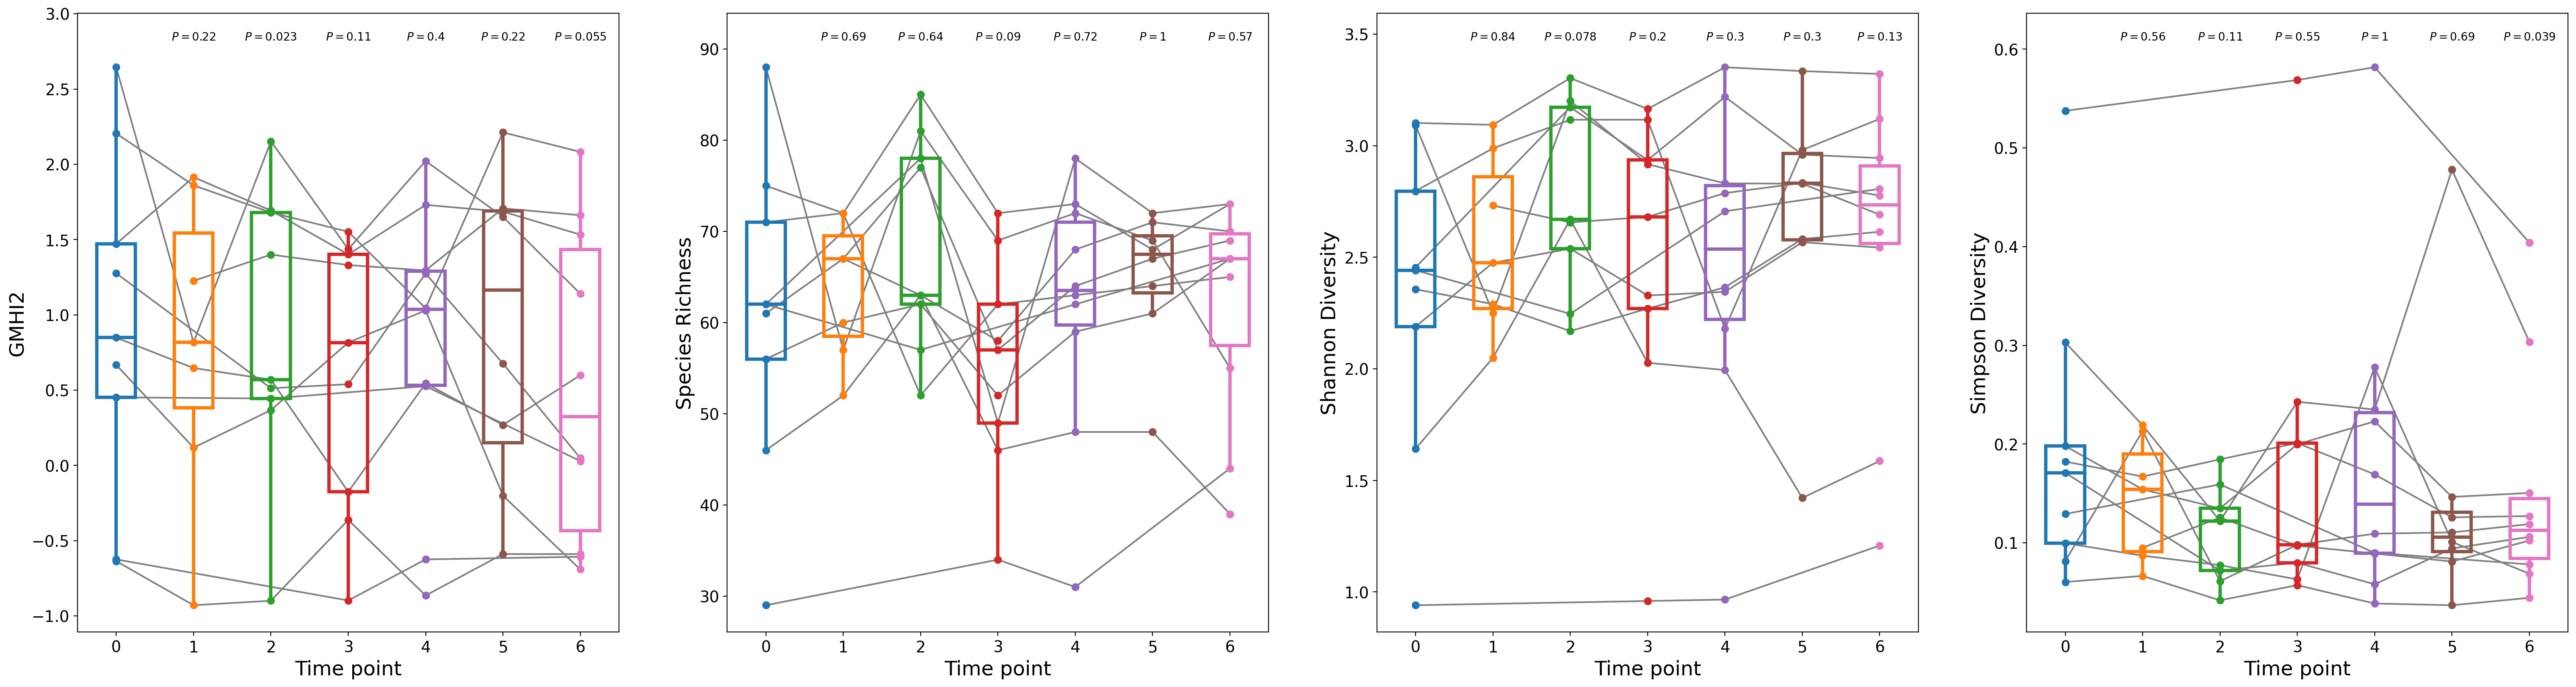

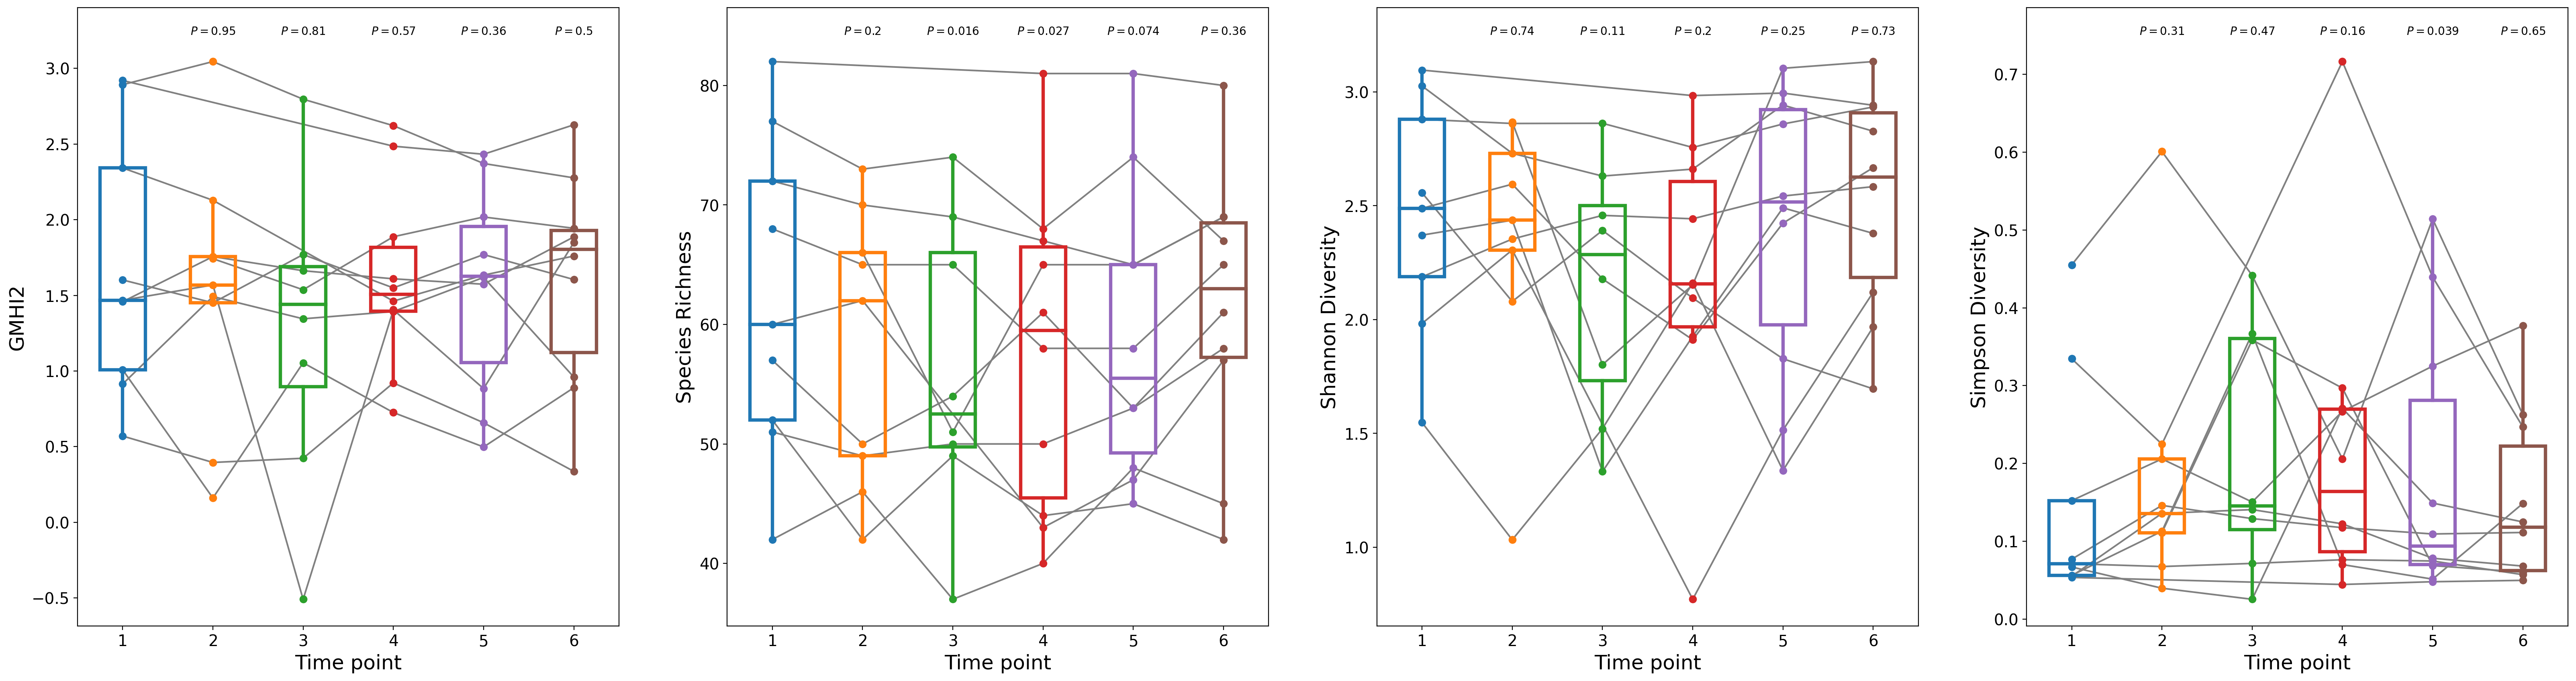

In [15]:
import warnings
warnings.filterwarnings('ignore')

for diet in meta["health_status/host_diet"].unique():
    print(diet)
    timepoints_sorted_curr = timepoints_sorted
    meta_curr = meta.copy()
    
    # because vegans don't have baseline samples for some reason
    if diet == "Vegan":
        timepoints_sorted_curr = timepoints_sorted[1:]
        meta_curr['timepoint_plot'] -= 1
        
    plot_longitudinal(meta_curr[meta_curr["health_status/host_diet"] == diet], indices, timepoints_sorted_curr, study + "_" + diet, stars=False)

In [16]:
timepoint_info = meta[["health_status/host_diet", "timepoint", "GMHI2"]]
timepoint_info

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
9003,EEN,2,0.501042
9016,EEN,6,-0.678862
9016,EEN,5,-0.466407
9016,EEN,3,0.060215
9016,EEN,2,0.902886
...,...,...,...
9017,Vegan,4,0.725676
9017,Vegan,3,1.054331
9017,Vegan,2,0.160644


In [17]:
timepoint_info.to_csv(os.path.join(config.FIG_DATA_DIR, "2e_diet.csv"))

In [18]:
# sanity check the plots

for group in ["EEN", "Omnivore"]:
    for index in ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]:
        for t in ["1", "2", "3", "4", "5", "6"]:
            a = meta[(meta["timepoint"] == "0") & (meta["health_status/host_diet"] == group)].sort_index()[index]
            b = meta[(meta["timepoint"] == t) & (meta["health_status/host_diet"] == group)].sort_index()[index]
            both = set(a.index) & set(b.index)
            a = a.loc[both]
            b = b.loc[both]
            print(wilcoxon(a, b))
        print()
    print()

WilcoxonResult(statistic=3.0, pvalue=0.3125)
WilcoxonResult(statistic=0.0, pvalue=0.03125)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)
WilcoxonResult(statistic=0.0, pvalue=0.015625)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

WilcoxonResult(statistic=7.0, pvalue=1.0)
WilcoxonResult(statistic=5.0, pvalue=0.3125)
WilcoxonResult(statistic=7.0, pvalue=0.1484375)
WilcoxonResult(statistic=8.5, pvalue=0.1953125)
WilcoxonResult(statistic=9.5, pvalue=0.46875)
WilcoxonResult(statistic=13.0, pvalue=0.546875)

WilcoxonResult(statistic=5.0, pvalue=0.625)
WilcoxonResult(statistic=2.0, pvalue=0.09375)
WilcoxonResult(statistic=16.0, pvalue=0.84375)
WilcoxonResult(statistic=10.0, pvalue=0.3125)
WilcoxonResult(statistic=13.0, pvalue=0.9375)
WilcoxonResult(statistic=15.0, pvalue=0.7421875)

WilcoxonResult(statistic=7.0, pvalue=1.0)
WilcoxonResult(statistic=2.0, pvalue=0.09375)
WilcoxonResult(statistic=18.0, pvalue=1.0)
WilcoxonResult(statistic=14.0